## Environment


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline    
# 在 Jupyter Notebook 中，为了让图片内嵌在网页中，可以打开如下开关

## Collecting data

In [2]:
dataTitanic = pd.read_csv('titanic.csv')
dataTitanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#count passengers
n = len(dataTitanic)  
n

891

## Analysing data

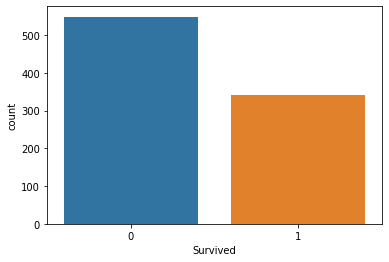

In [6]:
sns.countplot(x='Survived',data=dataTitanic)

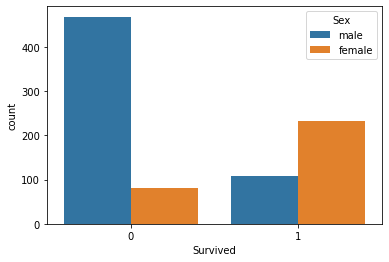

In [7]:
 sns.countplot(x='Survived', hue='Sex', data=dataTitanic)

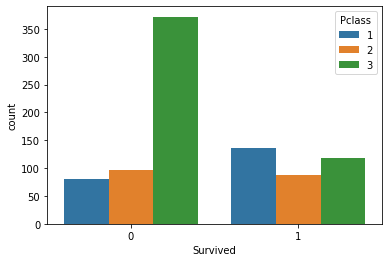

In [8]:
sns.countplot(x='Survived', hue='Pclass', data=dataTitanic)

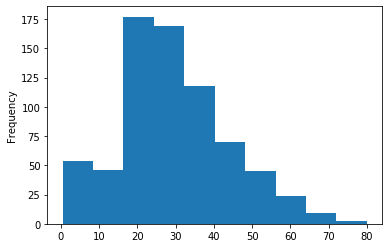

In [9]:
dataTitanic['Age'].plot.hist()

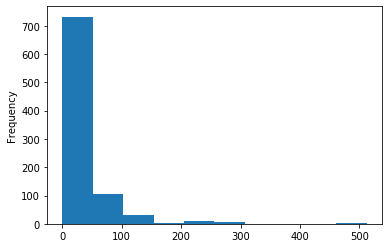

In [10]:
dataTitanic['Fare'].plot.hist()

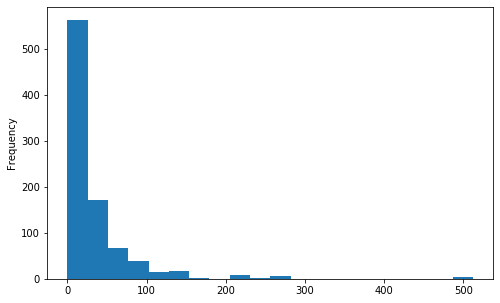

In [11]:
dataTitanic['Fare'].plot.hist(bins=20,figsize=(8,5))

In [12]:
dataTitanic.info()
#Sibsp=siblings and spouses
#Parch=parents and children

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


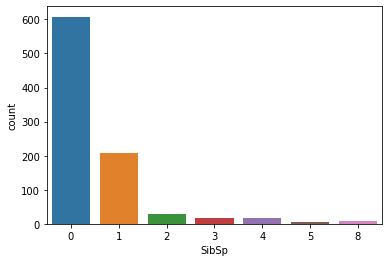

In [13]:
sns.countplot(x='SibSp', data=dataTitanic)

## Data washing

In [14]:
#clean the data by removing the NaN values and unnecessary columns in the dataset
dataTitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
dataTitanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
dataTitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

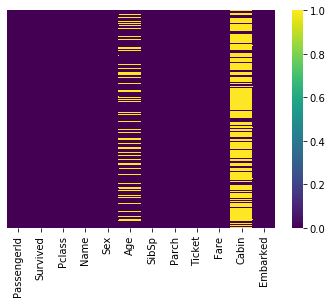

In [4]:
sns.heatmap(dataTitanic.isnull(),yticklabels=False,cmap='viridis')   #watch where the null values are

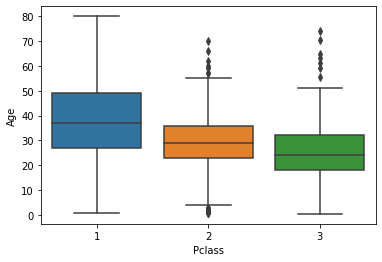

In [18]:
sns.boxplot(x='Pclass', y='Age', data=dataTitanic)

In [6]:
dataTitanic.drop('Cabin',axis=1,inplace=True)   #drop column Cabin

In [7]:
dataTitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [21]:
dataTitanic.dropna(inplace=True)  #drop any row who contains NaN

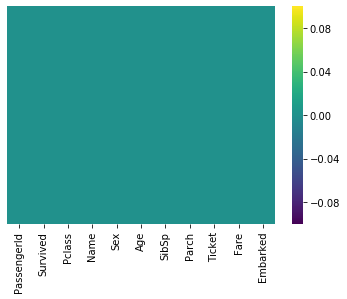

In [22]:
sns.heatmap(dataTitanic.isnull(),yticklabels=False,cmap='viridis')  #check if droped clearly

In [23]:
dataTitanic.isnull().sum()  #check if droped clearly

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
dataTitanic.shape

(712, 11)

In [25]:
sex=pd.get_dummies(dataTitanic['Sex'],drop_first=True)  #no need of the first columns
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [26]:
embarked=pd.get_dummies(dataTitanic['Embarked'],drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [27]:
pclass=pd.get_dummies(dataTitanic['Pclass'],drop_first=True) 
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [28]:
dataTitanic=pd.concat([dataTitanic,sex,embarked,pclass],axis=1)  #merge these tables

In [29]:
dataTitanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,1,0,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0,0,0


In [30]:
dataTitanic.drop(['Sex','Embarked','Pclass','PassengerId','Name'],axis=1,inplace=True)

In [31]:
dataTitanic

,Survived,Age,SibSp,Parch,Ticket,Fare,male,Q,S,2,3
0,0,22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,1,38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1
3,1,35.0,1,0,113803,53.1000,0,0,1,0,0
4,0,35.0,0,0,373450,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,382652,29.1250,0,1,0,0,1
886,0,27.0,0,0,211536,13.0000,1,0,1,1,0
887,1,19.0,0,0,112053,30.0000,0,0,1,0,0
889,1,26.0,0,0,111369,30.0000,1,0,0,0,0


In [32]:
dataTitanic.drop('Ticket',axis=1,inplace=True)

In [33]:
dataTitanic

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


## Train and test data

In [34]:
X=dataTitanic.drop('Survived',axis=1)  #all columns except Survived
y=dataTitanic['Survived']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logmodel=LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
predictions=logmodel.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test,predictions))  #最后一行是用support 加权平均算出来的

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       139
           1       0.75      0.73      0.74        96

    accuracy                           0.79       235
   macro avg       0.78      0.78      0.78       235
weighted avg       0.79      0.79      0.79       235



In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test,predictions)

array([[116,  23],
       [ 26,  70]])

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,predictions)

0.7914893617021277